In [374]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 
clean_data=pd.read_csv("data/cleaned_combined_gender.csv")

#removing responses that are 'Dont Know' and 'Refused to Answer'
clean_data=clean_data[clean_data['Has diabetes']<3]
clean_data=clean_data[clean_data['Close relative had diabetes?']<3]
clean_data=clean_data[clean_data['Covered by health insurance']<3]
clean_data=clean_data[clean_data['Doctor told you to reduce salt in diet']<4]
clean_data=clean_data[clean_data['Mariatal Status']<4]
clean_data=clean_data[clean_data['# of meals not home prepared']<2000]
clean_data=clean_data[clean_data['Ever told you had thyroid problem']<4]
clean_data=clean_data[clean_data['Ever told you had heart attack']<4]
clean_data=clean_data[clean_data['Ever told you had any liver condition']<4]
clean_data=clean_data[clean_data['Close relative had heart attack?']<4]
clean_data=clean_data[clean_data['Are you now controlling or losing weight']<3]



clean_data['Gender'] = clean_data['Gender'].replace({1: 1, 2: 0})
clean_data['Are you now controlling or losing weight'] = clean_data['Are you now controlling or losing weight'].replace({1: 1, 2: 0})
clean_data['Has diabetes'] = clean_data['Has diabetes'].replace({1: 1, 2: 0})
clean_data['Covered by health insurance'] = clean_data['Covered by health insurance'].replace({1: 1, 2: 0})
clean_data['Close relative had diabetes?'] = clean_data['Close relative had diabetes?'].replace({1: 1, 2: 0})
clean_data['Doctor told you to reduce salt in diet'] = clean_data['Doctor told you to reduce salt in diet'].replace({1: 1, 2: 0})


data= clean_data.sample(n=600, random_state=42)  # Set a random_state for reproducibility

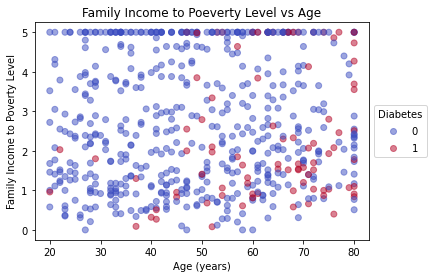

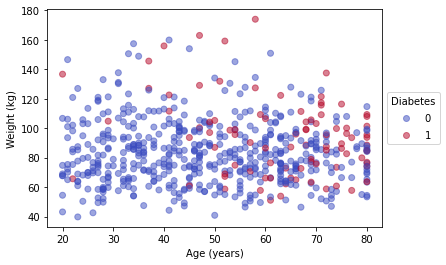

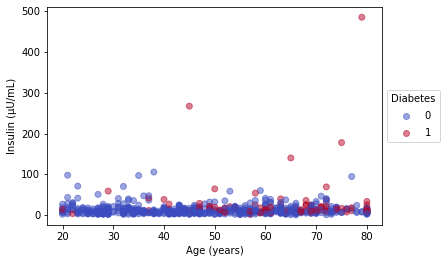

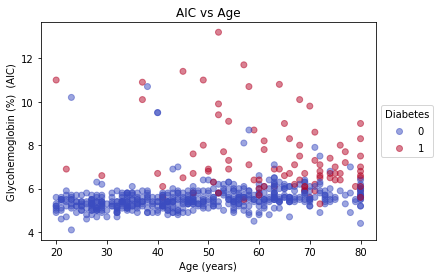

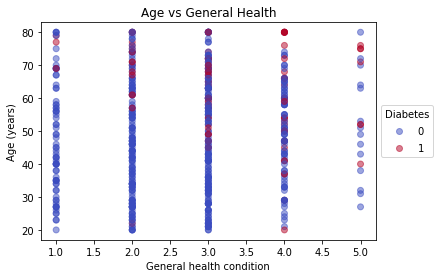

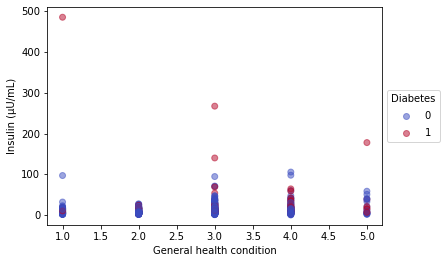

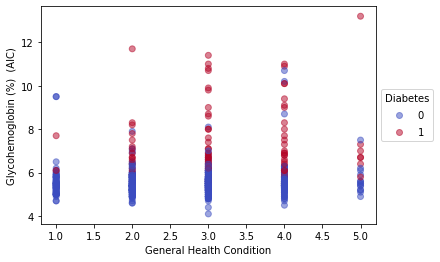

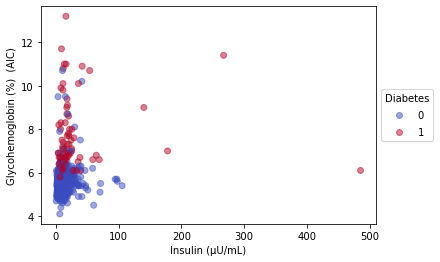

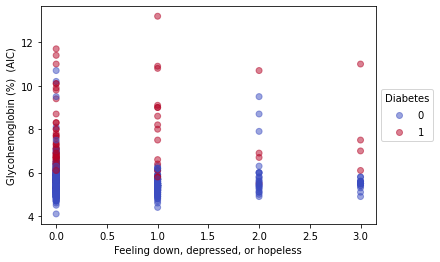

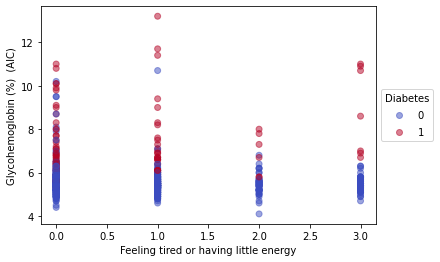

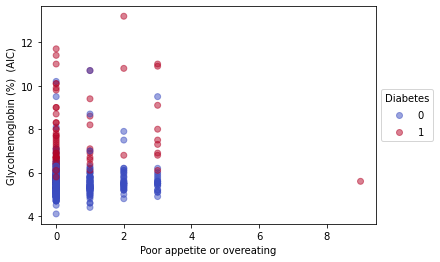

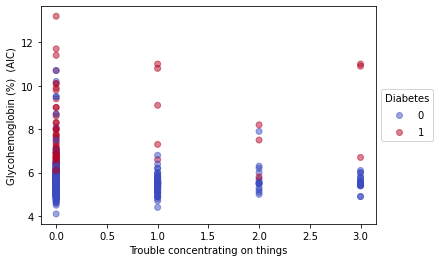

In [362]:

def plot_diabetes_scatter(x, y, diabetesvar, xlabel='Age (years)', ylabel='Family Income to Poverty Level', legend='Diabetes', *args):
    """
    Plot scatter plot with diabetes status.

    Parameters:
        x (pandas.Series): Data for x-axis.
        y (pandas.Series): Data for y-axis.
        diabetes_status (pandas.Series): Diabetes status (0 or 1).
        xlabel (str): Label for x-axis (default is 'Age (years)').
        ylabel (str): Label for y-axis (default is 'Family Income to Poverty Level').
    """
    scatter = plt.scatter(x, y, c=diabetesvar, alpha=0.5, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if args: 
        plt.title(args[0])
    plt.legend(*scatter.legend_elements(), title=legend, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

#diabetes and age
plot_diabetes_scatter(data['Age in years'], data['Family Income to Poverty'], data['Has diabetes'],'Age (years)', 'Family Income to Poverty Level', 'Diabetes', 'Family Income to Poeverty Level vs Age')
plot_diabetes_scatter(data['Age in years'], data['Weight (kg)'], data['Has diabetes'],xlabel='Age (years)', ylabel='Weight (kg)', legend='Diabetes')
plot_diabetes_scatter(data['Age in years'], data['Insulin (μU/mL)'], data['Has diabetes'],xlabel='Age (years)', ylabel='Insulin (μU/mL)', legend='Diabetes')
plot_diabetes_scatter(data['Age in years'], data['Glycohemoglobin (%)  (AIC)'], data['Has diabetes'],'Age (years)', 'Glycohemoglobin (%)  (AIC)', 'Diabetes', 'AIC vs Age')



#General Health Condition and Diabetes with AIC
plot_diabetes_scatter(data['General health condition'], data['Age in years'], data['Has diabetes'], 'General health condition', 'Age (years)', 'Diabetes', 'Age vs General Health')
plot_diabetes_scatter(data['General health condition'], data['Insulin (μU/mL)'], data['Has diabetes'],xlabel='General health condition', ylabel='Insulin (μU/mL)', legend='Diabetes')
plot_diabetes_scatter(data['General health condition'], data['Glycohemoglobin (%)  (AIC)'], data['Has diabetes'],xlabel='General Health Condition', ylabel='Glycohemoglobin (%)  (AIC)', legend='Diabetes')
plot_diabetes_scatter(data['Insulin (μU/mL)'], data['Glycohemoglobin (%)  (AIC)'], data['Has diabetes'],xlabel='Insulin (μU/mL)', ylabel='Glycohemoglobin (%)  (AIC)', legend='Diabetes')
plot_diabetes_scatter(data['Feeling down, depressed, or hopeless'], data['Glycohemoglobin (%)  (AIC)'], data['Has diabetes'],xlabel='Feeling down, depressed, or hopeless', ylabel='Glycohemoglobin (%)  (AIC)', legend='Diabetes')
plot_diabetes_scatter(data['Feeling tired or having little energy'], data['Glycohemoglobin (%)  (AIC)'], data['Has diabetes'],xlabel='Feeling tired or having little energy', ylabel='Glycohemoglobin (%)  (AIC)', legend='Diabetes')

plot_diabetes_scatter(data['Poor appetite or overeating'], data['Glycohemoglobin (%)  (AIC)'], data['Has diabetes'],xlabel='Poor appetite or overeating', ylabel='Glycohemoglobin (%)  (AIC)', legend='Diabetes')
plot_diabetes_scatter(data['Trouble concentrating on things'], data['Glycohemoglobin (%)  (AIC)'], data['Has diabetes'],xlabel='Trouble concentrating on things', ylabel='Glycohemoglobin (%)  (AIC)', legend='Diabetes')









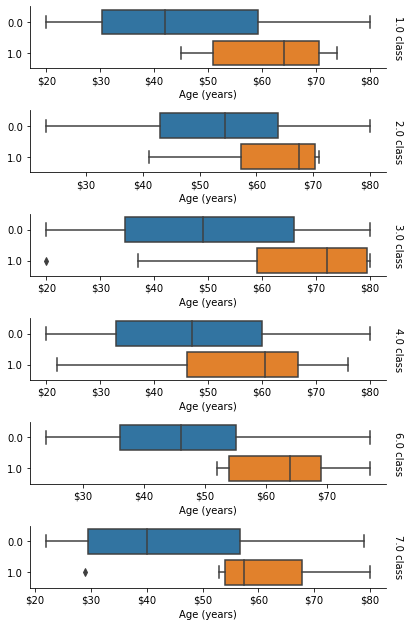

In [363]:
#age of diabetes in terms of ethnicity

g = sns.catplot(
    data=data,
    x="Age in years", y="Has diabetes", row="Race-Ethnicity",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Age (years)", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')



# Show the plot
plt.show()


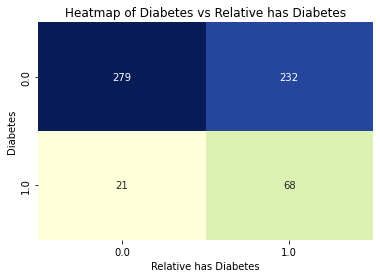

0.14833333333333334

In [364]:
# Create the pivot table
pivot_table = data.pivot_table(index='Has diabetes', columns='Close relative had diabetes?', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d",cbar=False)

# Add title and labels
plt.title("Heatmap of Diabetes vs Relative has Diabetes")
plt.xlabel("Relative has Diabetes")
plt.ylabel("Diabetes")

# Show the plot
plt.show()
pivot_table
(21+68)/(21+68+279+232)

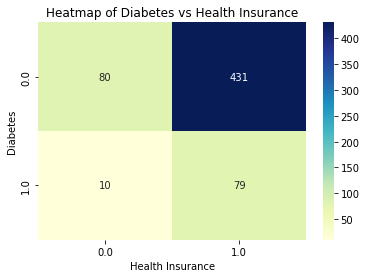

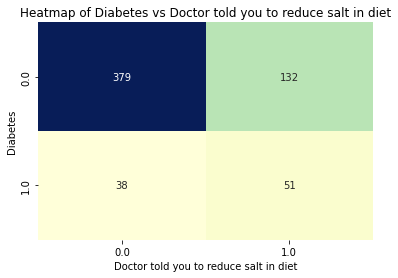

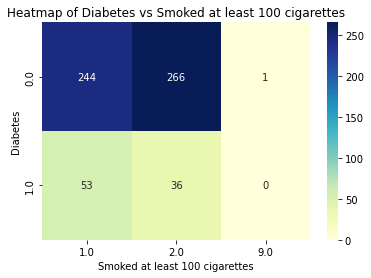

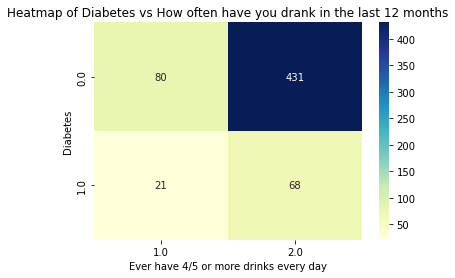

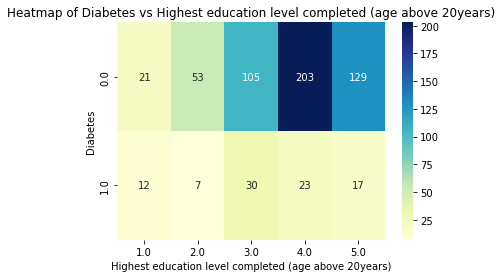

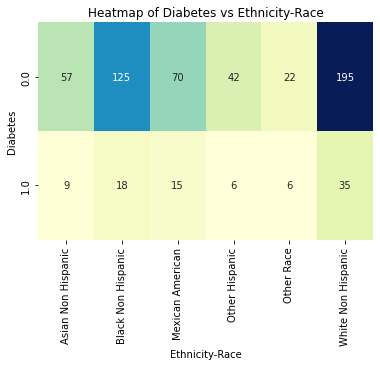

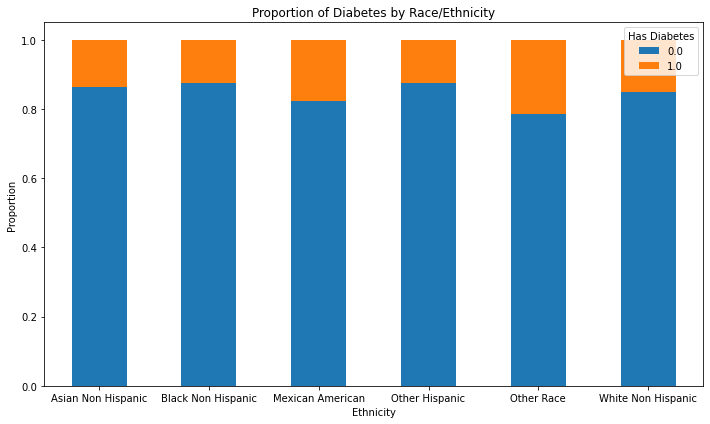

How healthy is the diet,1.0,2.0,3.0,4.0,5.0
Has diabetes,,,,,
0.0,35,104,206,130,36
1.0,7,15,41,21,5


In [343]:
# Create the pivot table
pivot_table = data.pivot_table(index='Has diabetes', columns='Covered by health insurance', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")

# Add title and labels
plt.title("Heatmap of Diabetes vs Health Insurance")
plt.xlabel("Health Insurance")
plt.ylabel("Diabetes")

# Show the plot
plt.show()





# Create the pivot table
pivot_table = data.pivot_table(index='Has diabetes', columns='Doctor told you to reduce salt in diet', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d", cbar=False)

# Add title and labels
plt.title("Heatmap of Diabetes vs Doctor told you to reduce salt in diet")
plt.xlabel("Doctor told you to reduce salt in diet")
plt.ylabel("Diabetes")

# Show the plot
plt.show()




# Create the pivot table
pivot_table = data.pivot_table(index='Has diabetes', columns='Smoked at least 100 cigarettes', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")

# Add title and labels
plt.title("Heatmap of Diabetes vs Smoked at least 100 cigarettes")
plt.xlabel("Smoked at least 100 cigarettes")
plt.ylabel("Diabetes")

# Show the plot
plt.show()


# Create the pivot table
pivot_table = data.pivot_table(index='Has diabetes', columns='Ever have 4/5 or more drinks every day?', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")

# Add title and labels
plt.title("Heatmap of Diabetes vs How often have you drank in the last 12 months")
plt.xlabel("Ever have 4/5 or more drinks every day")
plt.ylabel("Diabetes")

# Show the plot
plt.show()



# Create the pivot table
pivot_table = data.pivot_table(index='Has diabetes', columns='Highest education level completed (age above 20years)', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")

# Add title and labels
plt.title("Heatmap of Diabetes vs Highest education level completed (age above 20years)")
plt.xlabel("Highest education level completed (age above 20years)")
plt.ylabel("Diabetes")

# Show the plot
plt.show()


# Create the pivot table
pivot_table = data.pivot_table(index='Has diabetes', columns='Ethnicity Category', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d", cbar=False)

# Add title and labels
plt.title("Heatmap of Diabetes vs Ethnicity-Race")
plt.xlabel("Ethnicity-Race")
plt.ylabel("Diabetes")

# Show the plot
plt.show()



table = pd.crosstab(data['Ethnicity Category'], data['Has diabetes'], normalize='index')

# Plot the stacked bar chart
table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Ethnicity')
plt.ylabel('Proportion')
plt.title('Proportion of Diabetes by Race/Ethnicity')

# Show plot
plt.legend(title='Has Diabetes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

table

data.pivot_table(index='Has diabetes', columns='How healthy is the diet', aggfunc='size', fill_value=0)




In [372]:
# Define a function to map BMI values to categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 0 #underweight
    elif 18.5 <= bmi < 25.0:
        return 1 # normal
    elif 25.0 <= bmi < 30.0:
        return 2 #over weight
    else:
        return 3 #obese

def categorize_ethnicity(ethnicity):
    if ethnicity == 1:
        return 'Mexican American'
    elif ethnicity == 2:
        return 'Other Hispanic'
    elif ethnicity == 3:
        return 'White Non Hispanic'
    elif ethnicity == 4:
        return 'Black Non Hispanic'
    elif ethnicity == 6:  
        return 'Asian Non Hispanic'
    else:
        return 'Other Race'

    
    

data['BMI Category'] = data['BMI'].apply(categorize_bmi).astype(float)


data['Ethnicity Category'] = data['Race-Ethnicity'].apply(categorize_ethnicity)#.astype(float)





232       Mexican American
335         Other Hispanic
989     White Non Hispanic
2663      Mexican American
1516    Black Non Hispanic
               ...        
2529    Asian Non Hispanic
316         Other Hispanic
1945    Asian Non Hispanic
2645    Black Non Hispanic
1466    White Non Hispanic
Name: Ethnicity Category, Length: 600, dtype: object

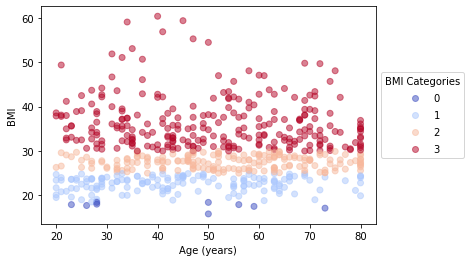

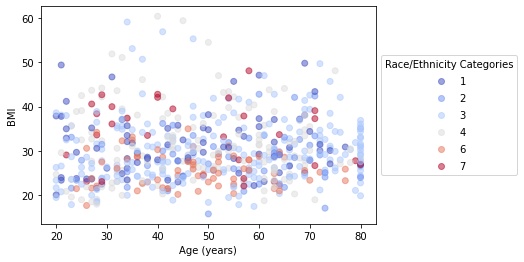

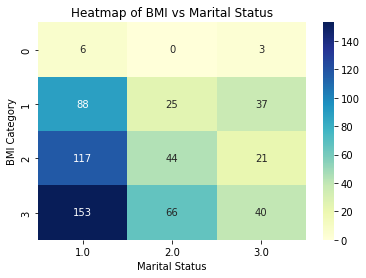

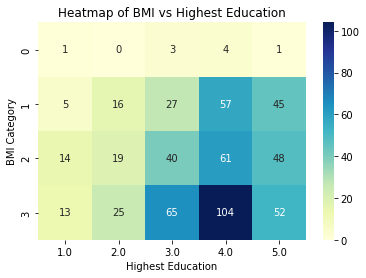

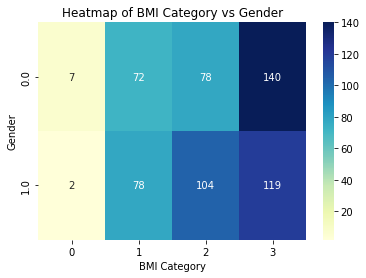

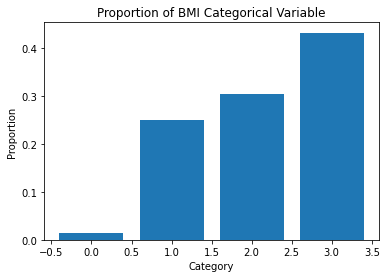

Obese Weight Proportion: 0.43166666666666664
Overweight Proportion: 0.30333333333333334
Normal Weight Proportion: 0.25
Underweight Weight Proportion: 0.015


In [366]:

plot_diabetes_scatter(data['Age in years'], data['BMI'], data['BMI Category'], xlabel='Age (years)', ylabel='BMI', legend='BMI Categories')
plot_diabetes_scatter(data['Age in years'], data['BMI'], data['Race-Ethnicity'], xlabel='Age (years)', ylabel='BMI', legend='Race/Ethnicity Categories')



# Create the pivot table
pivot_table = data.pivot_table(index='BMI Category', columns='Mariatal Status', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")

# Add title and labels
plt.title("Heatmap of BMI vs Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("BMI Category")

# Show the plot
plt.show()






# Create the pivot table
pivot_table = data.pivot_table(index='BMI Category', columns='Highest education level completed (age above 20years)', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")

# Add title and labels
plt.title("Heatmap of BMI vs Highest Education")
plt.xlabel("Highest Education")
plt.ylabel("BMI Category")

# Show the plot
plt.show()




# Create the pivot table
pivot_table = data.pivot_table(index='Gender', columns='BMI Category', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")

# Add title and labels
plt.title("Heatmap of BMI Category vs Gender")
plt.xlabel("BMI Category")
plt.ylabel("Gender")

# Show the plot
plt.show()






category_counts = data['BMI Category'].value_counts(normalize=True)

# Plot the bar plot
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.title('Proportion of BMI Categorical Variable')
plt.show()
print('Obese Weight Proportion:', category_counts[3])
print('Overweight Proportion:', category_counts[2])
print('Normal Weight Proportion:', category_counts[1])
print('Underweight Weight Proportion:', category_counts[0])




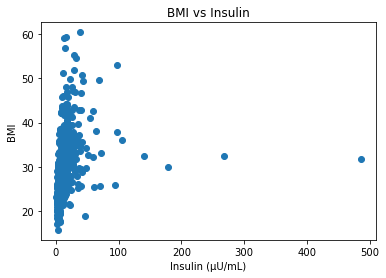

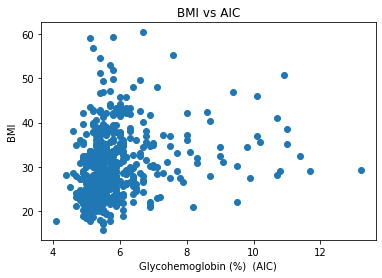

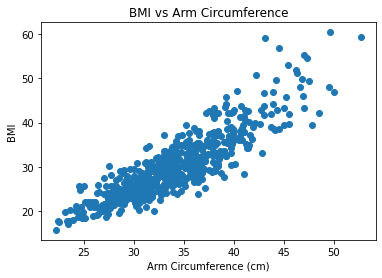

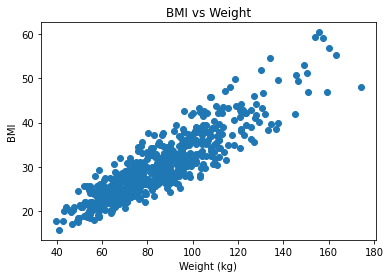

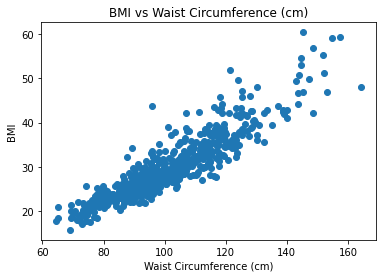

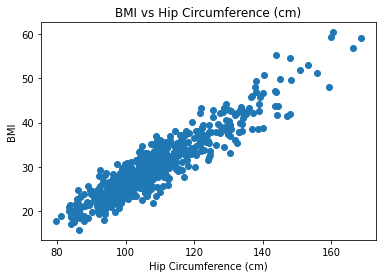

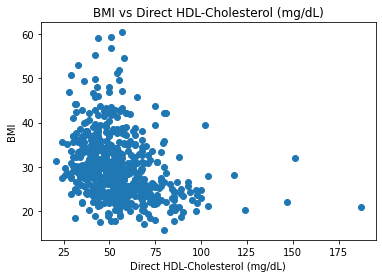

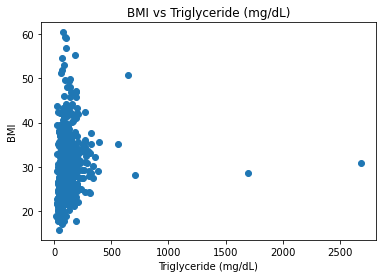

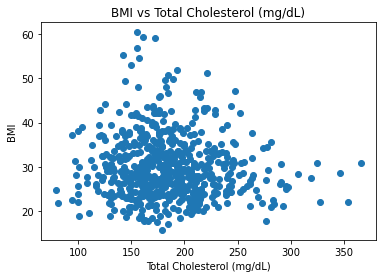

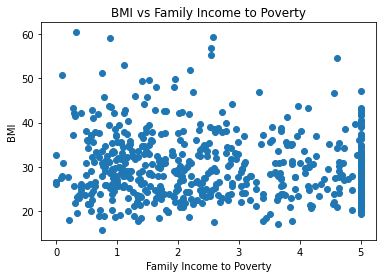

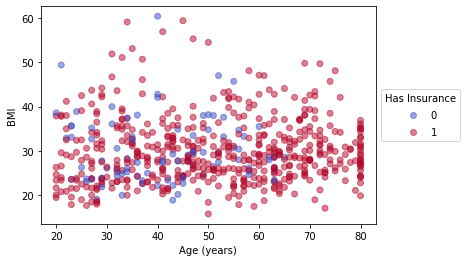

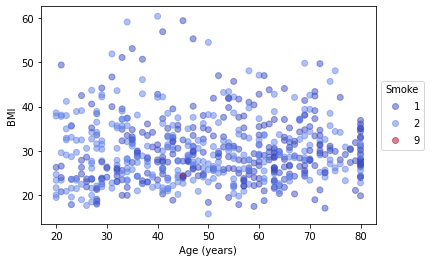

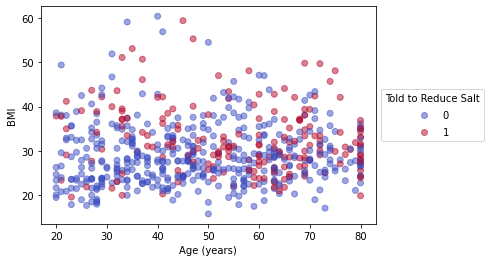

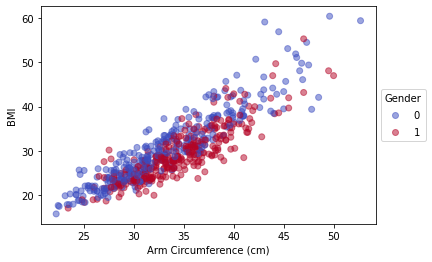

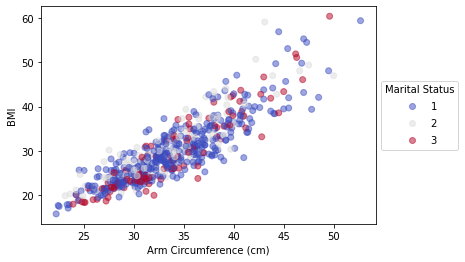

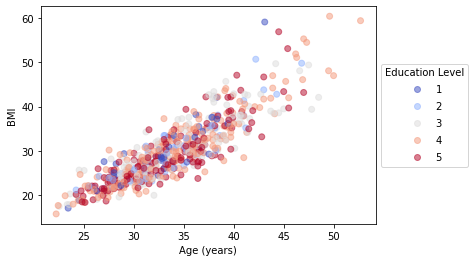

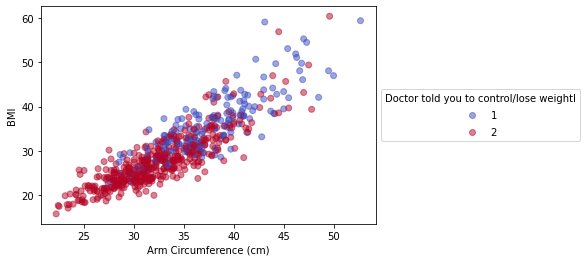

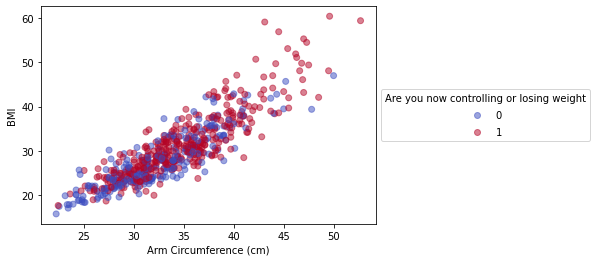

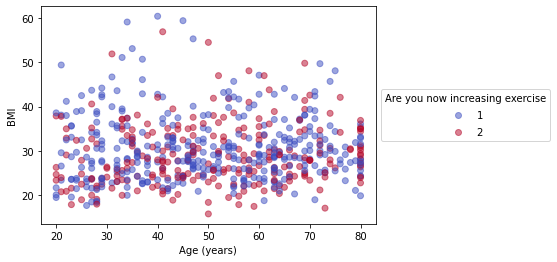

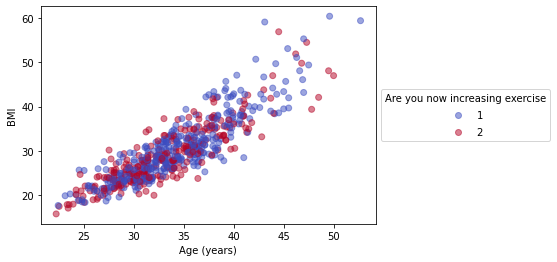

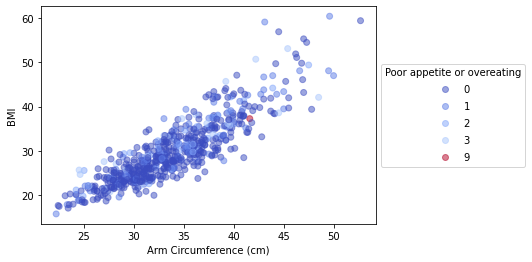

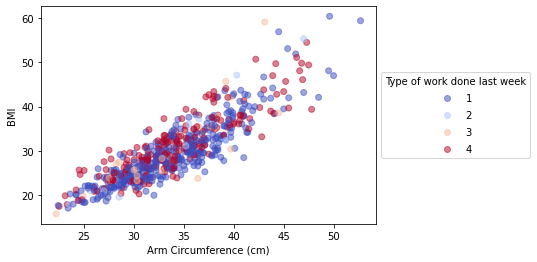

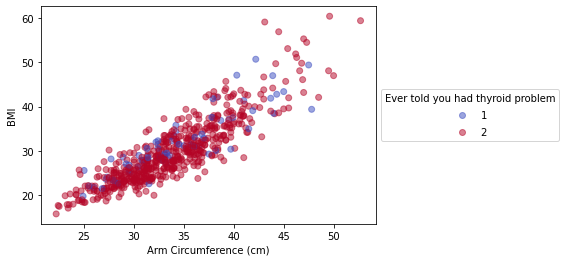

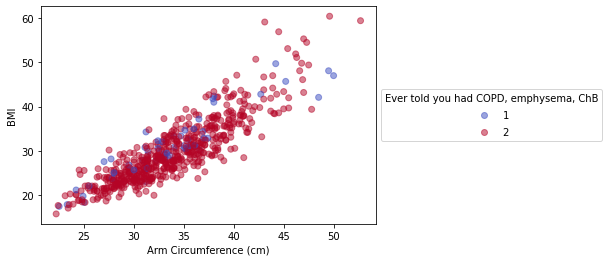

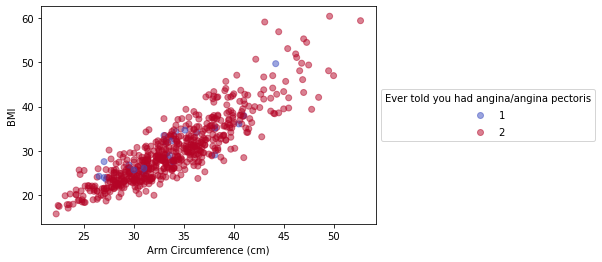

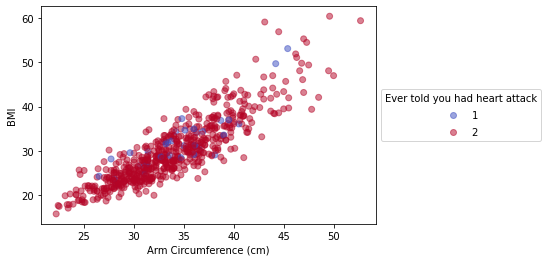

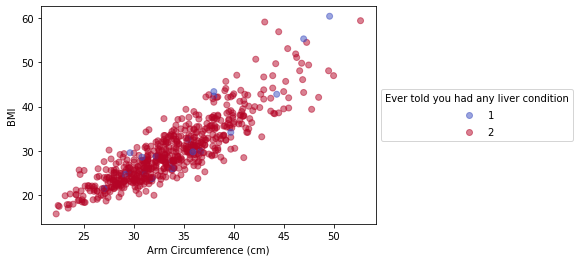

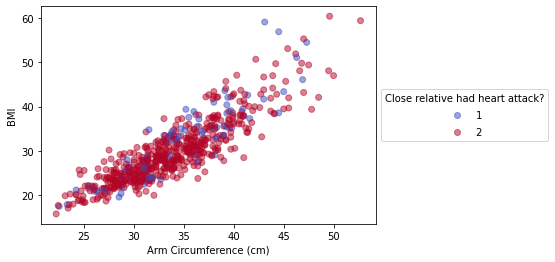

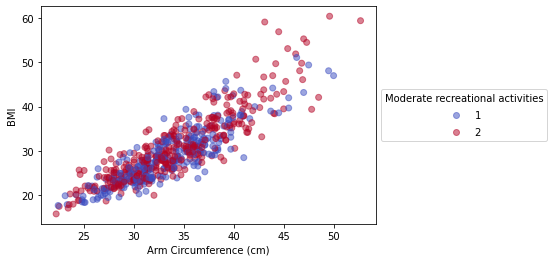

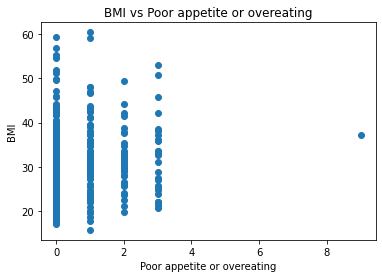

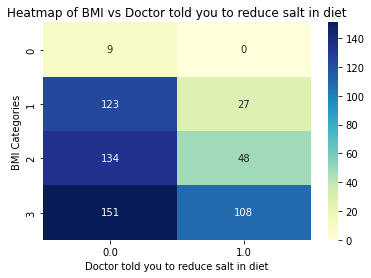

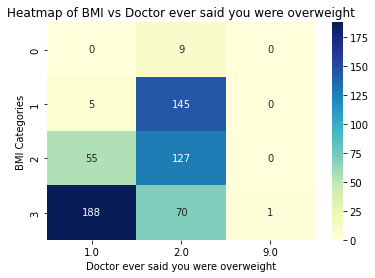

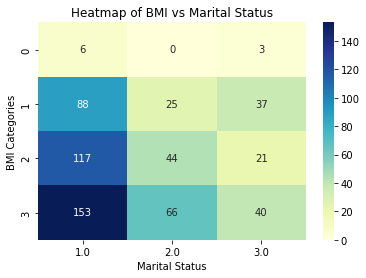

In [367]:
#plot_diabetes_scatter(data['Insulin (μU/mL)'], data['BMI'],xlabel='Insulin (μU/mL)', ylabel='BMI', legend='')
plt.scatter(data['Insulin (μU/mL)'], data['BMI'])
plt.xlabel('Insulin (μU/mL)')
plt.ylabel('BMI')
plt.title('BMI vs Insulin')
plt.show()

plt.scatter(data['Glycohemoglobin (%)  (AIC)'], data['BMI'])
plt.xlabel('Glycohemoglobin (%)  (AIC)')
plt.ylabel('BMI')
plt.title('BMI vs AIC')
plt.show()

plt.scatter(data['Arm Circumference (cm)'], data['BMI'])
plt.xlabel('Arm Circumference (cm)')
plt.ylabel('BMI')
plt.title('BMI vs Arm Circumference')
plt.show()


plt.scatter(data['Weight (kg)'], data['BMI'])
plt.xlabel('Weight (kg)')
plt.ylabel('BMI')
plt.title('BMI vs Weight')
plt.show()

plt.scatter(data['Waist Circumference (cm)'], data['BMI'])
plt.xlabel('Waist Circumference (cm)')
plt.ylabel('BMI')
plt.title('BMI vs Waist Circumference (cm)')
plt.show()

plt.scatter(data['Hip Circumference (cm)'], data['BMI'])
plt.xlabel('Hip Circumference (cm)')
plt.ylabel('BMI')
plt.title('BMI vs Hip Circumference (cm)')
plt.show()











plt.scatter(data['Direct HDL-Cholesterol (mg/dL)'], data['BMI'])
plt.xlabel('Direct HDL-Cholesterol (mg/dL)')
plt.ylabel('BMI')
plt.title('BMI vs Direct HDL-Cholesterol (mg/dL)')
plt.show()


plt.scatter(data['Triglyceride (mg/dL)'], data['BMI'])
plt.xlabel('Triglyceride (mg/dL)')
plt.ylabel('BMI')
plt.title('BMI vs Triglyceride (mg/dL)')
plt.show()

plt.scatter(data['Total Cholesterol (mg/dL)'], data['BMI'])
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('BMI')
plt.title('BMI vs Total Cholesterol (mg/dL)')
plt.show()





plt.scatter(data['Family Income to Poverty'], data['BMI'])
plt.xlabel('Family Income to Poverty')
plt.ylabel('BMI')
plt.title('BMI vs Family Income to Poverty')
plt.show()







plot_diabetes_scatter(data['Age in years'], data['BMI'], data['Covered by health insurance'], xlabel='Age (years)', ylabel='BMI', legend='Has Insurance')
plot_diabetes_scatter(data['Age in years'], data['BMI'], data['Smoked at least 100 cigarettes'], xlabel='Age (years)', ylabel='BMI', legend='Smoke')
plot_diabetes_scatter(data['Age in years'], data['BMI'], data['Doctor told you to reduce salt in diet'], xlabel='Age (years)', ylabel='BMI', legend='Told to Reduce Salt')





plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Gender'], xlabel='Arm Circumference (cm)', ylabel='BMI', legend='Gender')

plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Mariatal Status'], xlabel='Arm Circumference (cm)', ylabel='BMI', legend='Marital Status')
plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Highest education level completed (age above 20years)'], xlabel='Age (years)', ylabel='BMI', legend='Education Level')
plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Doctor told you to control/lose weight'], xlabel='Arm Circumference (cm)', ylabel='BMI', legend='Doctor told you to control/lose weightl')
plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Are you now controlling or losing weight'], xlabel='Arm Circumference (cm)', ylabel='BMI', legend='Are you now controlling or losing weight')
plot_diabetes_scatter(data['Age in years'], data['BMI'], data['Are you now increasing exercise'], xlabel='Age (years)', ylabel='BMI', legend='Are you now increasing exercise')
plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Are you now increasing exercise'], xlabel='Age (years)', ylabel='BMI', legend='Are you now increasing exercise')
plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Poor appetite or overeating'], xlabel='Arm Circumference (cm)', ylabel='BMI', legend='Poor appetite or overeating')
plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Type of work done last week'], xlabel='Arm Circumference (cm)', ylabel='BMI', legend='Type of work done last week')

plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Ever told you had thyroid problem'], xlabel='Arm Circumference (cm)', ylabel='BMI', legend='Ever told you had thyroid problem')
plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Ever told you had COPD, emphysema, ChB'], xlabel='Arm Circumference (cm)', ylabel='BMI', legend='Ever told you had COPD, emphysema, ChB')
plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Ever told you had angina/angina pectoris'], xlabel='Arm Circumference (cm)', ylabel='BMI', legend='Ever told you had angina/angina pectoris')
plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Ever told you had heart attack'], xlabel='Arm Circumference (cm)', ylabel='BMI', legend='Ever told you had heart attack')
plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Ever told you had any liver condition'], xlabel='Arm Circumference (cm)', ylabel='BMI', legend='Ever told you had any liver condition')
plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Close relative had heart attack?'], xlabel='Arm Circumference (cm)', ylabel='BMI', legend='Close relative had heart attack?')
plot_diabetes_scatter(data['Arm Circumference (cm)'], data['BMI'], data['Moderate recreational activities'], xlabel='Arm Circumference (cm)', ylabel='BMI', legend='Moderate recreational activities')






plt.scatter(data['Poor appetite or overeating'], data['BMI'])
plt.xlabel('Poor appetite or overeating')
plt.ylabel('BMI')
plt.title('BMI vs Poor appetite or overeating')
plt.show()



# Create the pivot table
pivot_table = data.pivot_table(index='BMI Category', columns='Doctor told you to reduce salt in diet', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")

# Add title and labels
plt.title("Heatmap of BMI vs Doctor told you to reduce salt in diet")
plt.xlabel("Doctor told you to reduce salt in diet")
plt.ylabel("BMI Categories")

# Show the plot
plt.show()




# Create the pivot table
pivot_table = data.pivot_table(index='BMI Category', columns='Doctor ever said you were overweight', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")

# Add title and labels
plt.title("Heatmap of BMI vs Doctor ever said you were overweight")
plt.xlabel("Doctor ever said you were overweight")
plt.ylabel("BMI Categories")

# Show the plot
plt.show()





# Create the pivot table
pivot_table = data.pivot_table(index='BMI Category', columns='Mariatal Status', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")

# Add title and labels
plt.title("Heatmap of BMI vs Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("BMI Categories")

# Show the plot
plt.show()







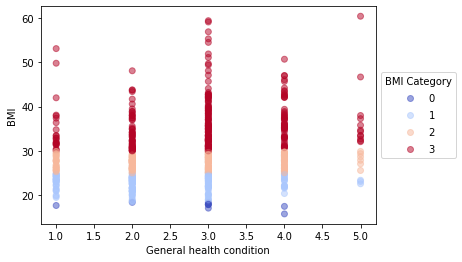

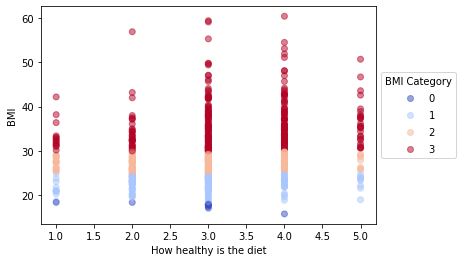

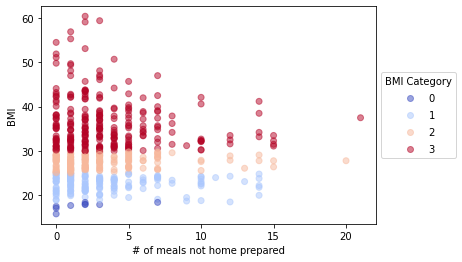

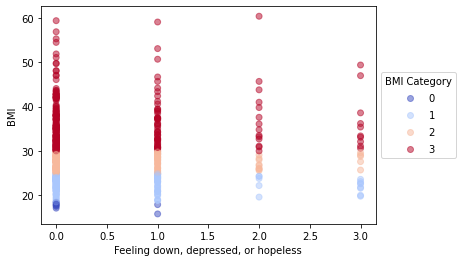

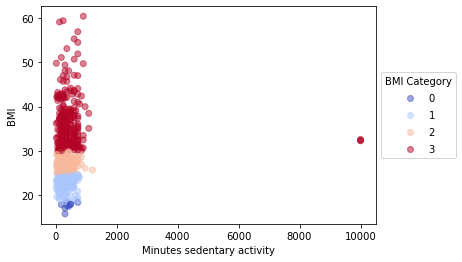

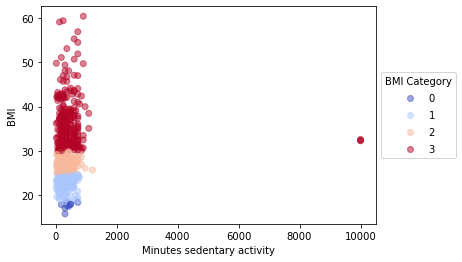

In [373]:
plot_diabetes_scatter(data['General health condition'], data['BMI'], data['BMI Category'],xlabel='General health condition', ylabel='BMI', legend='BMI Category')
plot_diabetes_scatter(data['How healthy is the diet'], data['BMI'], data['BMI Category'],xlabel='How healthy is the diet', ylabel='BMI', legend='BMI Category')
plot_diabetes_scatter(data['# of meals not home prepared'], data['BMI'], data['BMI Category'],xlabel='# of meals not home prepared', ylabel='BMI', legend='BMI Category')


plot_diabetes_scatter(data['Feeling down, depressed, or hopeless'], data['BMI'], data['BMI Category'],xlabel='Feeling down, depressed, or hopeless', ylabel='BMI', legend='BMI Category')
plot_diabetes_scatter(data['Minutes sedentary activity'], data['BMI'], data['BMI Category'],xlabel='Minutes sedentary activity', ylabel='BMI', legend='BMI Category')
plot_diabetes_scatter(data['Minutes sedentary activity'], data['BMI'], data['BMI Category'],xlabel='Minutes sedentary activity', ylabel='BMI', legend='BMI Category')


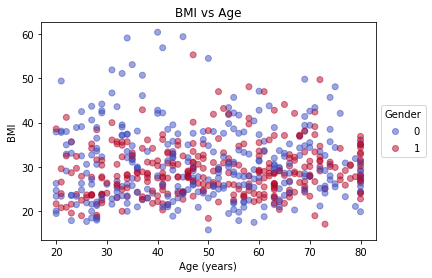

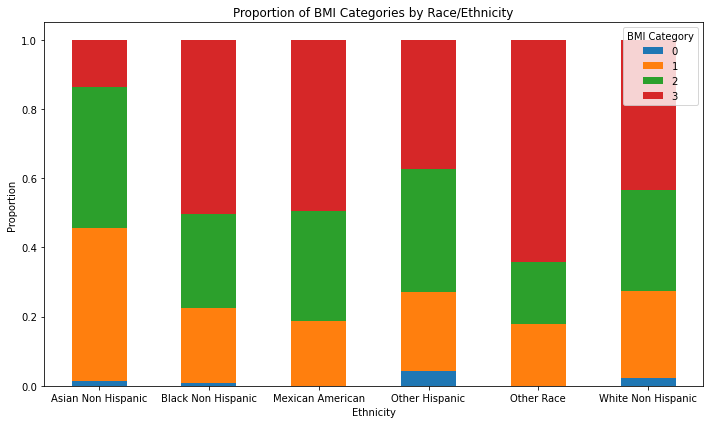

In [368]:
#plot_diabetes_scatter(data['Insulin (μU/mL)'], data['BMI'], data['Gender'], xlabel='Insulin  (μU/mL)', ylabel='BMI', legend='Gender')
plot_diabetes_scatter(data['Age in years'], data['BMI'], data['Gender'], 'Age (years)', 'BMI', 'Gender', 'BMI vs Age')


table = pd.crosstab(data['Ethnicity Category'], data['BMI Category'], normalize='index')

# Plot the stacked bar chart
table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Ethnicity')
plt.ylabel('Proportion')
plt.title('Proportion of BMI Categories by Race/Ethnicity')

# Show plot
plt.legend(title='BMI Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

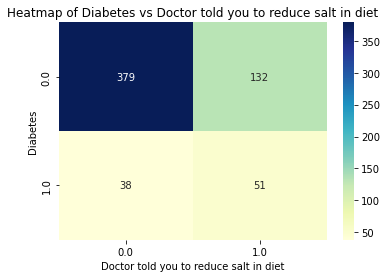

In [369]:
#create the pivot table
pivot_table = data.pivot_table(index='Has diabetes', columns='Doctor told you to reduce salt in diet', aggfunc='size', fill_value=0)

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")

# Add title and labels
plt.title("Heatmap of Diabetes vs Doctor told you to reduce salt in diet")
plt.xlabel("Doctor told you to reduce salt in diet")
plt.ylabel("Diabetes")

# Show the plot
plt.show()
